In [440]:
#Имопортирую библиотеки
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from numpy import (linspace,logspace,zeros,ones,outer,meshgrid,
                   pi,sin,cos,sqrt,exp)
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import statsmodels.api as sm
from numpy.random import normal

In [441]:
#Настраиваю отображение пандас
pd.options.display.max_rows = 150
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (5, 5)
plt.rcParams['font.family'] = 'sans-serif'

In [461]:
#Задаем исходные данные х - Доходность ММВБ, y - доходность алроса
Xi = [-0.0129, 0.0060, -0.0005, 0.0102, 0.0056, -0.0043, 0.0075, 0.0096, 0.0046, 0.0032, 0.0024, 0.0035, -0.0051, 0.0025, 0.0059, -0.0011, 0.0001, 0.0003, 0.0062, -0.0015]
Yi = [0.0006, -0.0094, -0.0034, 0.0013, 0.0028, -0.0039, 0.0022, 0.0002, 0.0015, -0.0075, -0.0050, -0.0189, -0.0049, -0.0087, 0.0032, -0.0096, -0.0025, -0.0061, -0.0009, 0.0119]
print(Xi)
print(Yi)

[-0.0129, 0.006, -0.0005, 0.0102, 0.0056, -0.0043, 0.0075, 0.0096, 0.0046, 0.0032, 0.0024, 0.0035, -0.0051, 0.0025, 0.0059, -0.0011, 0.0001, 0.0003, 0.0062, -0.0015]
[0.0006, -0.0094, -0.0034, 0.0013, 0.0028, -0.0039, 0.0022, 0.0002, 0.0015, -0.0075, -0.005, -0.0189, -0.0049, -0.0087, 0.0032, -0.0096, -0.0025, -0.0061, -0.0009, 0.0119]


(array([-0.03, -0.02, -0.01,  0.  ,  0.01,  0.02,  0.03]),
 <a list of 7 Text xticklabel objects>)

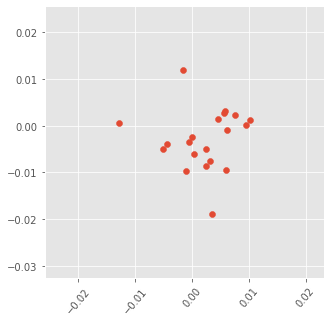

In [462]:
#Строим облако наблюдений
scatter(Xi, Yi)
plt.xticks(rotation = 50)

In [463]:
npXi = np.array(Xi).reshape((-1,1))
npYi = np.array(Yi)
print(npXi)
print(npYi)

[[-0.0129]
 [ 0.006 ]
 [-0.0005]
 [ 0.0102]
 [ 0.0056]
 [-0.0043]
 [ 0.0075]
 [ 0.0096]
 [ 0.0046]
 [ 0.0032]
 [ 0.0024]
 [ 0.0035]
 [-0.0051]
 [ 0.0025]
 [ 0.0059]
 [-0.0011]
 [ 0.0001]
 [ 0.0003]
 [ 0.0062]
 [-0.0015]]
[ 0.0006 -0.0094 -0.0034  0.0013  0.0028 -0.0039  0.0022  0.0002  0.0015
 -0.0075 -0.005  -0.0189 -0.0049 -0.0087  0.0032 -0.0096 -0.0025 -0.0061
 -0.0009  0.0119]


In [464]:
#Задаем регрессионную модель исходя из наших данных, находим к R2 коэффициент детерминации, 
#находим нулевую точку и наклон, выводим формулу функции
model = LinearRegression().fit(npXi, npYi)
r_sq = model.score(npXi, npYi)
print('Y =', model.intercept_,'+', model.coef_, '*X')
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

Y = -0.002980230258461902 + [0.05935083] *X
coefficient of determination: 0.002543246392984866
intercept: -0.002980230258461902
slope: [0.05935083]


In [456]:
#Проверим больше показателей через библиотеку статмодель, 
#и посмотрим % качества модели по показателям AIC и BIC
x = sm.add_constant(npXi)
print(x)
model2 = sm.OLS(npYi, x)
results = model2.fit()
print(results.summary())

[[ 1.00e+00 -1.29e-02]
 [ 1.00e+00  6.00e-03]
 [ 1.00e+00 -5.00e-04]
 [ 1.00e+00  1.02e-02]
 [ 1.00e+00  5.60e-03]
 [ 1.00e+00 -4.30e-03]
 [ 1.00e+00  7.50e-03]
 [ 1.00e+00  9.60e-03]
 [ 1.00e+00  4.60e-03]
 [ 1.00e+00  3.20e-03]
 [ 1.00e+00  2.40e-03]
 [ 1.00e+00  3.50e-03]
 [ 1.00e+00 -5.10e-03]
 [ 1.00e+00  2.50e-03]
 [ 1.00e+00  5.90e-03]
 [ 1.00e+00 -1.10e-03]
 [ 1.00e+00  1.00e-04]
 [ 1.00e+00  3.00e-04]
 [ 1.00e+00  6.20e-03]
 [ 1.00e+00 -1.50e-03]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.053
Method:                 Least Squares   F-statistic:                   0.04590
Date:                Mon, 10 Feb 2020   Prob (F-statistic):              0.833
Time:                        20:45:00   Log-Likelihood:                 72.969
No. Observations:                  20   AIC:                     

In [457]:
#Задаем функцию по линейной прямой в переменную y_pred
y_pred = model.intercept_ + model.coef_ * npXi
print('predicted response:', y_pred, sep='\n')


predicted response:
[[-0.00374586]
 [-0.00262413]
 [-0.00300991]
 [-0.00237485]
 [-0.00264787]
 [-0.00323544]
 [-0.0025351 ]
 [-0.00241046]
 [-0.00270722]
 [-0.00279031]
 [-0.00283779]
 [-0.0027725 ]
 [-0.00328292]
 [-0.00283185]
 [-0.00263006]
 [-0.00304552]
 [-0.0029743 ]
 [-0.00296243]
 [-0.00261226]
 [-0.00306926]]


In [458]:

x_new = np.arange(5).reshape((-1, 1))
y_new = model.predict(x_new)
print(x_new)
print(y_new)

[[0]
 [1]
 [2]
 [3]
 [4]]
[-0.00298023  0.0563706   0.11572144  0.17507227  0.2344231 ]


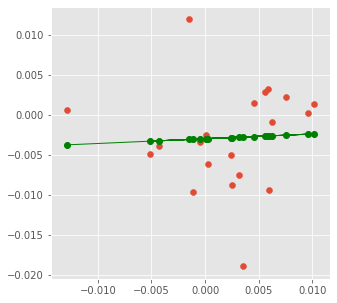

In [459]:
#Построим график линейной модели регрессии и облака наблюдений
#Задаем функцию по линейной прямой в переменную y_pred
y_pred = model.intercept_ + model.coef_ * npXi
# создаём область, в которой будет отображаться график
#npXi = np.linspace(-0.02,0.01,10)
# рисуем графики
plt.plot(npXi, y_pred, 'go-', label='line 1', linewidth=1)
scatter(Xi, Yi)
# показываем график
plt.show()

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[-0.00298023  0.0563706   0.11572144  0.17507227  0.2344231   0.29377394
  0.35312477  0.4124756   0.47182644  0.53117727]


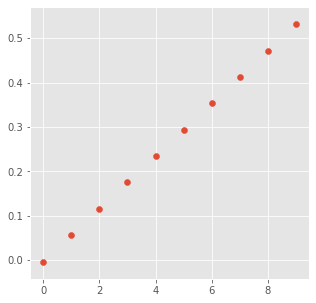

In [460]:
#Используя нашу линейную регрессионную модель, зададим регрессор x_new - 1,2,3,4,5 
#Найдем значения критериальных переменных Y и построим график
x_new = np.arange(10).reshape((-1, 1))
y_new = model.predict(x_new)
scatter(x_new, y_new)
print(x_new)
print(y_new)